In [6]:
using SumOfSquares, DynamicPolynomials, TaylorModels, Plots

┌ Info: Recompiling stale cache file /Users/aa25desh/.julia/compiled/v1.1/TaylorModels/pZXWp.ji for TaylorModels [314ce334-5f6e-57ae-acf6-00b6e903104a]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/aa25desh/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [7]:
x1, x2 = set_variables(Float64, ["x1","x2"], order = 4)

2-element Array{TaylorN{Float64},1}:
  1.0 x1 + 𝒪(‖x‖⁵)
  1.0 x2 + 𝒪(‖x‖⁵)

In [8]:
p1 = 1 + x1 + x2^3  

 1.0 + 1.0 x1 + 1.0 x2³ + 𝒪(‖x‖⁵)

In [9]:
p2 = -2 + x2 -0.5x1^2 

 - 2.0 + 1.0 x2 - 0.5 x1² + 𝒪(‖x‖⁵)

In [10]:
Dx1 = (-2.0 .. 2.0)
Dx2 = (-3.0 .. 3.0)

[-3, 3]

In [11]:
typeof(Dx1)

Interval{Float64}

In [84]:
dom = Dx1×Dx2
rem = Interval(-0.1, 0.1)
x0 = (0.0 .. 0.0)×(0.0 .. 0.0)
X = TaylorModelN(p1, rem, x0, dom)

 1.0 + 1.0 x1 + 1.0 x2³ + [-0.100001, 0.100001]

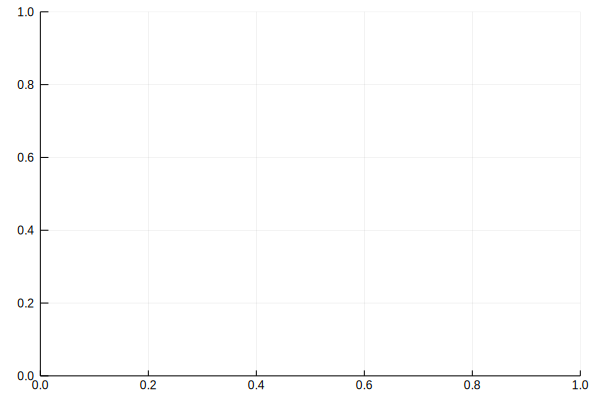

In [208]:
fi = plot()

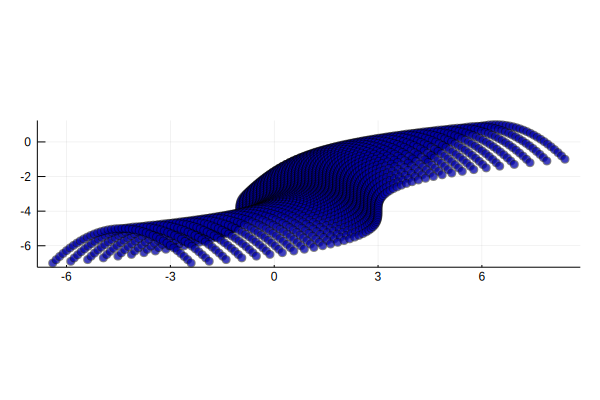

In [209]:
using LazySets:Singleton
for  x1 in Dx1.lo:0.1:Dx1.hi, x2 in Dx2.lo:0.1:Dx2.hi  
     a1 = 1 + x1 + 0.2*x2^3  
     a2 = -2 + x2 -0.5*x1^2 
     plot!(fi, Singleton([a1, a2]),legend=:none, aspectratio=.5, color="blue")
end 
fi

In [210]:
using Ipopt

In [211]:
model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))

@variable(model, inf(Dx1) <= x1 <= sup(Dx1))
@variable(model, inf(Dx2) <= x2 <= sup(Dx2))
@variable(model, inf(rem) <= y <= sup(rem))
@variable(model, a1)
@variable(model, a2)
@NLconstraint(model, a1 == 1 + x1 + 0.2*x2^3 + y)
@NLconstraint(model, a2 == -2 + x2 -0.5*x1^2 + y)
@objective(model, Max, -0.38*a1 + 0.62*a2)
model


A JuMP Model
Maximization problem with:
Variables: 5
Objective function type: GenericAffExpr{Float64,VariableRef}
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 3 constraints
Nonlinear: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: a1, a2, x1, x2, y

In [212]:
optimize!(model)
@show objective_value(model)

objective_value(model) = -0.7979495330653119


-0.7979495330653119

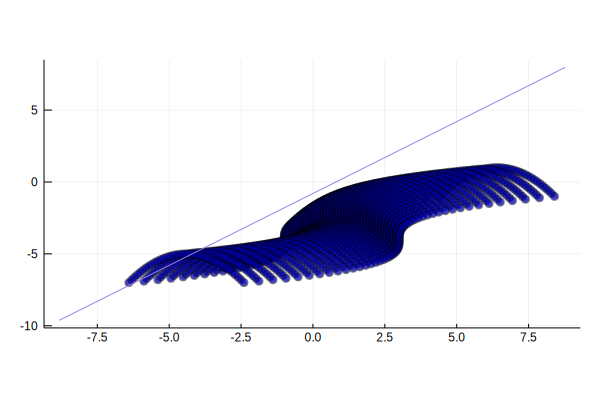

In [213]:
plot!(x-> x + objective_value(model),-9 , 9)

In [214]:
model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(model, inf(Dx1) <= x1 <= sup(Dx1))
@variable(model, inf(Dx2) <= x2 <= sup(Dx2))
@variable(model, inf(rem) <= y <= sup(rem))
@variable(model, a1)
@variable(model, a2)
@NLconstraint(model, a1 == 1 + 1.0*x1 + 0.2*x2^3 + y)
@NLconstraint(model, a2 == -2 + 1.0*x2 -0.5*x1^2 + y)
@NLobjective(model, Max, a2)
optimize!(model)
@show objective_value(model)

objective_value(model) = 1.1000000349707155


1.1000000349707155

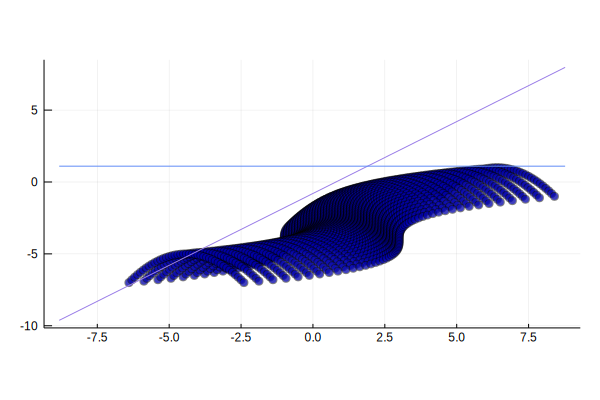

In [215]:
plot!(x->  objective_value(model),-9 , 9)

In [216]:
model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(model, inf(Dx1) <= x1 <= sup(Dx1))
@variable(model, inf(Dx2) <= x2 <= sup(Dx2))
@variable(model, inf(rem) <= y <= sup(rem))
@variable(model, a1)
@variable(model, a2)
@NLconstraint(model, a1 == 1 + 1x1  + x2^3 + y)
@NLconstraint(model, a2 == -2 + 1x2 - 0.5x1^2 + y)
@objective(model, Max, -a2)
optimize!(model)
@show objective_value(model)
model

objective_value(model) = 7.100000072464805


A JuMP Model
Maximization problem with:
Variables: 5
Objective function type: GenericAffExpr{Float64,VariableRef}
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 3 constraints
Nonlinear: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: a1, a2, x1, x2, y

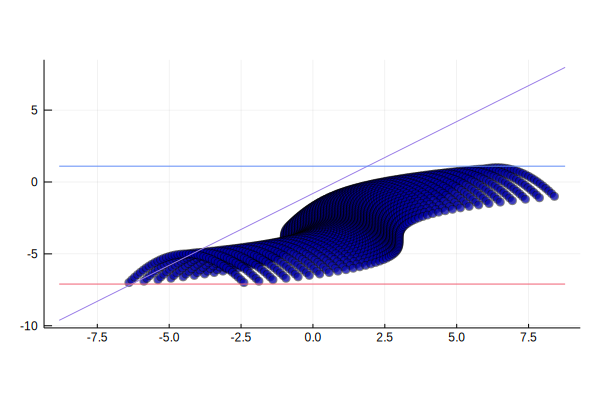

In [217]:
plot!(x->  -objective_value(model),-9 , 9)